<a href="https://colab.research.google.com/github/Aditisharma92001/Exploratory-Data-Analysis-on-Geolocational-Data/blob/main/EDA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv(r"https://raw.githubusercontent.com/harishrongala/Food_Choices/master/food.csv")
df.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,cook,cuisine,diet_current,drink,eating_changes,eating_out,employment,ethnic_food,exercise,father_education,father_profession,fav_cuisine,fav_food,food_childhood,fries,fruit_day,grade_level,greek_food,healthy_feeling,healthy_meal,ideal_diet,income,indian_food,italian_food,life_rewarding,marital_status,meals_dinner_friend,mother_education,mother_profession,nutritional_check,on_off_campus,parents_cook,pay_meal_out,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,2.0,NaN,eat good and exercise,1.0,eat faster,3,3.0,1,1.0,5.0,profesor,Arabic cuisine,1.0,rice and chicken,2,5,2,5,2,looks not oily,being healthy,5.0,5,5,1.0,1.0,"rice, chicken, soup",1.0,unemployed,5,1.0,1,2,5.0,3.0,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",3.0,1.0,I eat about three times a day with some snacks...,2.0,I eat out more than usual.,2,2.0,4,1.0,2.0,Self employed,Italian,1.0,"chicken and biscuits, beef soup, baked beans",1,4,4,4,5,"Grains, Veggies, (more of grains and veggies),...",Try to eat 5-6 small meals a day. While trying...,4.0,4,4,1.0,2.0,"Pasta, steak, chicken",4.0,Nurse RN,4,1.0,1,4,4.0,3.0,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,3.0,"toast and fruit for breakfast, salad for lunch...",1.0,sometimes choosing to eat fast food instead of...,2,3.0,5,2.0,2.0,owns business,italian,3.0,"mac and cheese, pizza, tacos",1,5,3,5,6,usually includes natural ingredients; nonproce...,i would say my ideal diet is my current diet,6.0,5,5,7.0,2.0,"chicken and rice with veggies, pasta, some kin...",2.0,owns business,4,2.0,1,3,5.0,6.0,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,2.0,"College diet, cheap and easy foods most nights...",2.0,Accepting cheap and premade/store bought foods,2,3.0,5,3.0,2.0,Mechanic,Turkish,1.0,"Beef stroganoff, tacos, pizza",2,4,4,5,7,"Fresh fruits& vegetables, organic meats","Healthy, fresh veggies/fruits & organic foods",6.0,5,5,2.0,2.0,Grilled chicken \rStuffed Shells\rHomemade Chili,4.0,Special Education Teacher,2,1.0,1,2,5.0,5.0,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,2.0,I try to eat healthy but often struggle becaus...,2.0,I have eaten generally the same foods but I do...,2,2.0,4,1.0,4.0,IT,Italian,3.0,"Pasta, chicken tender, pizza",1,4,4,4,6,"A lean protein such as grilled chicken, green ...",Ideally I would like to be able to eat healthi...,6.0,2,5,1.0,1.0,"Chicken Parmesan, Pulled Pork, Spaghetti and m...",5.0,Substance Abuse Conselor,3,1.0,1,4,2.0,4.0,1.0,1.0,4,940.0,500,Softball,4,2,760,190


In [ ]:
data = pd.DataFrame(df[['cook','eating_out','employment','ethnic_food','exercise','fruit_day','income','on_off_campus','pay_meal_out','sports','veggies_day']])
data.head()

,cook,eating_out,employment,ethnic_food,exercise,fruit_day,income,on_off_campus,pay_meal_out,sports,veggies_day
0,2.0,3,3.0,1,1.0,5,5.0,1.0,2,1.0,5
1,3.0,2,2.0,4,1.0,4,4.0,1.0,4,1.0,4
2,1.0,2,3.0,5,2.0,5,6.0,2.0,3,2.0,5
3,2.0,2,3.0,5,3.0,4,6.0,1.0,2,2.0,3
4,1.0,2,2.0,4,1.0,4,6.0,1.0,4,1.0,4


## Data Exploration and Visualization

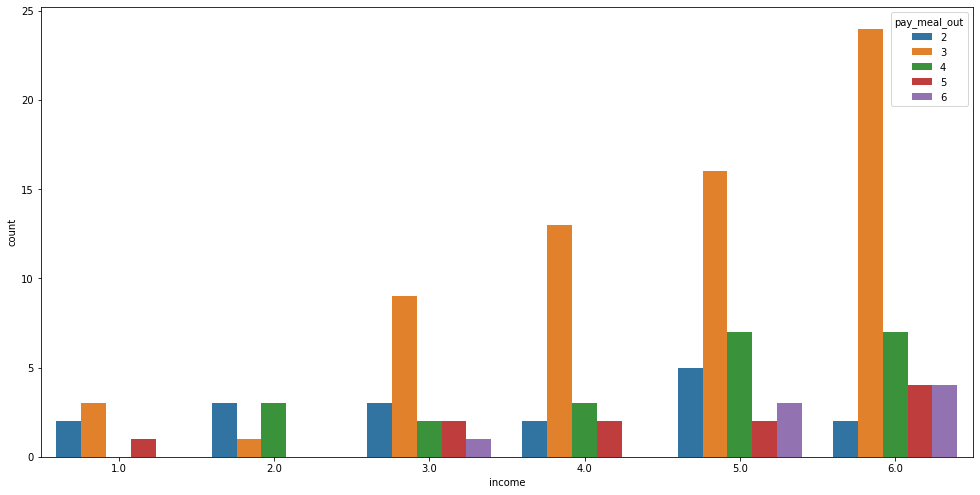

In [ ]:
a4_dims = (16.7, 8.27)
fig,ax = plt.subplots(figsize=a4_dims)
sns.countplot(ax=ax, x="income", hue='pay_meal_out', data=data)

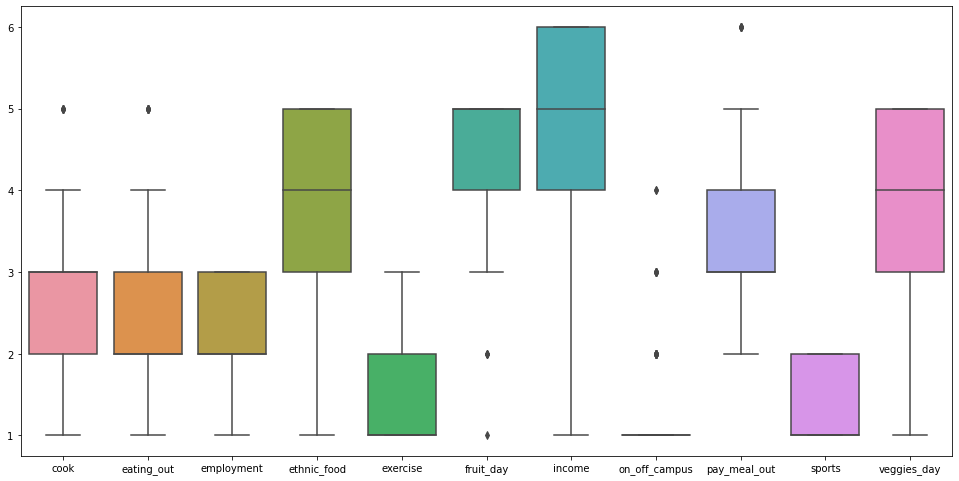

In [ ]:
a4_dims = (16.7, 8.27)
fig,ax = plt.subplots(figsize=a4_dims)
boxplot = sns.boxplot(ax=ax, data=data)
boxplot

## Data Preprocessing

In [ ]:
data.isnull().sum()

cook              3
eating_out        0
employment        9
ethnic_food       0
exercise         13
fruit_day         0
income            1
on_off_campus     1
pay_meal_out      0
sports            2
veggies_day       0
dtype: int64

In [ ]:
data.dropna(subset=['cook','employment','income','on_off_campus','sports'],inplace=True)

In [ ]:
data.fillna(data.mean(), inplace=True)
data.isnull().sum()

cook             0
eating_out       0
employment       0
ethnic_food      0
exercise         0
fruit_day        0
income           0
on_off_campus    0
pay_meal_out     0
sports           0
veggies_day      0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110 entries, 0 to 123
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cook           110 non-null    float64
 1   eating_out     110 non-null    int64  
 2   employment     110 non-null    float64
 3   ethnic_food    110 non-null    int64  
 4   exercise       110 non-null    float64
 5   fruit_day      110 non-null    int64  
 6   income         110 non-null    float64
 7   on_off_campus  110 non-null    float64
 8   pay_meal_out   110 non-null    int64  
 9   sports         110 non-null    float64
 10  veggies_day    110 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 10.3 KB


In [ ]:
data.reset_index(inplace=True)

## Run KMeans clustering on the data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(data)

array([[0.        , 0.25      , 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.00813008, 0.5       , 0.25      , ..., 0.5       , 0.        ,
        0.75      ],
       [0.01626016, 0.        , 0.25      , ..., 0.25      , 1.        ,
        1.        ],
       ...,
       [0.97560976, 0.5       , 0.25      , ..., 0.5       , 0.        ,
        1.        ],
       [0.99186992, 0.5       , 0.5       , ..., 0.5       , 1.        ,
        0.75      ],
       [1.        , 0.5       , 1.        , ..., 0.25      , 1.        ,
        0.5       ]])

In [ ]:
k_rng = range(1,11)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(data[['income']])
    sse.append(km.inertia_)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  """


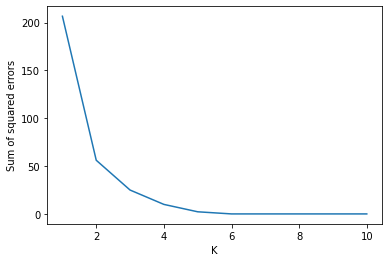

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared errors')
plt.plot(k_rng, sse)

In [ ]:
km = KMeans(n_clusters=3)
label = km.fit_predict(data)

In [ ]:
data['cluster'] = label
data

,index,cook,eating_out,employment,ethnic_food,exercise,fruit_day,income,on_off_campus,pay_meal_out,sports,veggies_day,cluster
0,0,2.0,3,3.0,1,1.0,5,5.0,1.0,2,1.0,5,1
1,1,3.0,2,2.0,4,1.0,4,4.0,1.0,4,1.0,4,1
2,2,1.0,2,3.0,5,2.0,5,6.0,2.0,3,2.0,5,1
3,3,2.0,2,3.0,5,3.0,4,6.0,1.0,2,2.0,3,1
4,4,1.0,2,2.0,4,1.0,4,6.0,1.0,4,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,118,3.0,2,2.0,4,2.0,5,3.0,3.0,4,2.0,5,0
106,119,2.0,2,2.0,5,2.0,5,2.0,1.0,3,1.0,5,0
107,120,3.0,2,1.0,4,2.0,5,4.0,3.0,4,1.0,5,0
108,122,3.0,3,3.0,5,2.0,4,2.0,1.0,4,2.0,4,0


No handles with labels found to put in legend.


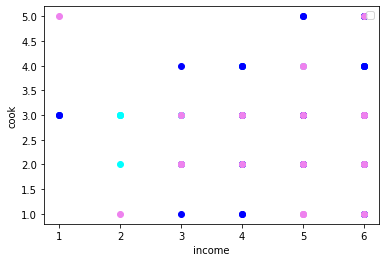

In [ ]:
data1 = data[data.cluster == 0]
data2 = data[data.cluster == 1]
data3 = data[data.cluster == 2]


plt.scatter(data1.income, data1['cook'], color = 'cyan')
plt.scatter(data2.income, data2['cook'], color = 'blue')
plt.scatter(data3.income, data3['cook'], color = 'violet')


plt.xlabel('income')
plt.ylabel('cook')
plt.legend()

## Data Collection

In [ ]:
from pandas.io.json import json_normalize
import folium
import requests

In [ ]:
CLIENT_ID = '1OGFZQM14RM0MCAFG2XJ1D0V52BFBNUV0QTFZC0JHGWQ4GL1' # your Foursquare ID
CLIENT_SECRET = 'SC1CT0OSE15JBO4UKYI1H5ARLPIUKYWNHTV5C1GF4LMYGBIO' # your Foursquare Secret
VERSION = "20210729"                       #'20180604'
# limit of number of venues returned by Foursquare API
LIMIT = 10000 
radius = 30000

In [ ]:
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    13.133521,77.567135,
    radius, 
    LIMIT)
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '610a4cefd18fec39508b4e83'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-54cf2060498e7db4b0f114ab-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/bikeshop_',
          'suffix': '.png'},
         'id': '4bf58dd8d48988d115951735',
         'name': 'Bike Shop',
         'pluralName': 'Bike Shops',
         'primary': True,
         'shortName': 'Bike Shop'}],
       'id': '54cf2060498e7db4b0f114ab',
       'location': {'cc': 'IN',
        'city': 'Bangalore',
        'country': 'India',
        'distance': 8085,
        'formattedAddress': ['Bangalore', 'Karnātaka', 'India'],
        'labeledLatLngs': [{'label': 'display',
          'lat': 13.168697398893203,
          'lng': 77.63238890489083}],
        'lat': 13.1686973988932

In [ ]:
venues = results['response']['groups'][0]['items']
nearby_venues = pd.json_normalize(venues)

In [ ]:
nearby_venues

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,venue.location.cc,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.location.address,venue.location.crossStreet,venue.location.postalCode,venue.location.neighborhood,venue.venuePage.id
0,e-0-54cf2060498e7db4b0f114ab-0,0,"[{'summary': 'This spot is popular', 'type': '...",54cf2060498e7db4b0f114ab,Decathlon,13.168697,77.632389,"[{'label': 'display', 'lat': 13.16869739889320...",8085,IN,Bangalore,Karnātaka,India,"[Bangalore, Karnātaka, India]","[{'id': '4bf58dd8d48988d115951735', 'name': 'B...",0,[],NaN,NaN,NaN,NaN,NaN
1,e-0-582f4eadfb549a1ff5a23b0a-1,0,"[{'summary': 'This spot is popular', 'type': '...",582f4eadfb549a1ff5a23b0a,The Druid Garden,13.063946,77.591492,"[{'label': 'display', 'lat': 13.06394560121628...",8182,IN,Bangalore,Karnātaka,India,[40/1 Century Corbel Commercial (Sahakarnagar)...,"[{'id': '50327c8591d4c4b30a586d5d', 'name': 'B...",0,[],40/1 Century Corbel Commercial,Sahakarnagar,NaN,NaN,NaN
2,e-0-4f1869c7e4b0ebf9e4ae9134-2,0,"[{'summary': 'This spot is popular', 'type': '...",4f1869c7e4b0ebf9e4ae9134,Orion Mall,13.011313,77.555039,"[{'label': 'display', 'lat': 13.01131324470653...",13667,IN,Bangalore,Karnātaka,India,"[#26/1 (Dr. Rajkumar Rd, Rajajinagar), Bangalo...","[{'id': '4bf58dd8d48988d1fd941735', 'name': 'S...",0,[],#26/1,"Dr. Rajkumar Rd, Rajajinagar",560055,NaN,NaN
3,e-0-4be40cce910020a11725d114-3,0,"[{'summary': 'This spot is popular', 'type': '...",4be40cce910020a11725d114,Corner House,13.028051,77.572970,"[{'label': 'display', 'lat': 13.02805082855679...",11757,IN,Bangalore,Karnātaka,India,"[New BEL Road (80 Feet Road), Bangalore 560094...","[{'id': '4bf58dd8d48988d1c9941735', 'name': 'I...",0,[],New BEL Road,80 Feet Road,560094,NaN,NaN
4,e-0-4ba0b3a0f964a520587837e3-4,0,"[{'summary': 'This spot is popular', 'type': '...",4ba0b3a0f964a520587837e3,Shri Sagar (Formerly CTR),12.998309,77.569460,"[{'label': 'display', 'lat': 12.99830948570850...",15053,IN,Bangalore,Karnātaka,India,"[#154, Ground Flr (Margosa Road, Malleshwaram)...","[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",0,[],"#154, Ground Flr","Margosa Road, Malleshwaram",NaN,Malleswaram,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,e-0-4c8a413b6418a1430407dece-95,0,"[{'summary': 'This spot is popular', 'type': '...",4c8a413b6418a1430407dece,Corner House,12.917455,77.593280,"[{'label': 'display', 'lat': 12.91745511116864...",24218,IN,Bangalore,Karnātaka,India,"[#1225, Near Ragi Gudda Temple (26th Main, 9th...","[{'id': '4bf58dd8d48988d1c9941735', 'name': 'I...",0,[],"#1225, Near Ragi Gudda Temple","26th Main, 9th Blk, Jayanagar",560069,NaN,NaN
96,e-0-4dab1396cda1652a2b9ac2ab-96,0,"[{'summary': 'This spot is popular', 'type': '...",4dab1396cda1652a2b9ac2ab,Food Street,12.950956,77.577798,"[{'label': 'display', 'lat': 12.95095590316827...",20355,IN,Bangalore,Karnātaka,India,"[Near Sajjan Rao Park (V.V Puram), Bangalore 5...","[{'id': '4bf58dd8d48988d1c7941735', 'name': 'S...",0,[],Near Sajjan Rao Park,V.V Puram,560004,NaN,NaN
97,e-0-4b794609f964a520c1f12ee3-97,0,"[{'summary': 'This spot is popular', 'type': '...",4b794609f964a520c1f12ee3,Hotel Ballal Residency,12.971476,77.608136,"[{'label': 'display', 'lat': 12.97147626118793...",18578,IN,Bangalore,Karnātaka,India,"[#74/4 (3rd Crs, Residency Rd), Bangalore 5600...","[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",0,[],#74/4,"3rd Crs, Residency Rd",560025,NaN,NaN
98,e-0-4b8676e7f964a520318b31e3-98,0,"[{'summary': 'This spot is popular', 'type': '...",4b8676e7f964a520318b31e3,Vidyarthi Bhavan,12.945082,77.571415,"[{'label': 'display', 'lat': 12.94508159006891...",20981,IN,Bangalore,Karnātaka,India,"[#32 (Gandhi Bazaar Rd), Bangalore 560004, Kar...","[{'id': '4bf58dd8d48988d10f941735'

## Data Preprocessing of new dataset

In [ ]:
resta=[]
oth=[]
for lat,long in zip(nearby_venues['venue.location.lat'],nearby_venues['venue.location.lng']):
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    lat,long,
    500, 
    100)
    
    res = requests.get(url).json()
    venue = res['response']['groups'][0]['items']
    nearby_venue = pd.json_normalize(venue)
    df=nearby_venue['venue.categories']
    
    g=[]
    for i in range(0,df.size):
        g.append(df[i][0]['icon']['prefix'].find('food'))
    co=0
    for i in g:
        if i>1:
            co+=1
    resta.append(co)
    oth.append(len(g)-co)

nearby_venues['Restaurant']=resta
nearby_venues['Fruits,Vegetables,Groceries']=oth
nearby_venues

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,venue.location.cc,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.location.address,venue.location.crossStreet,venue.location.postalCode,venue.location.neighborhood,venue.venuePage.id,Restaurant,"Fruits,Vegetables,Groceries"
0,e-0-54cf2060498e7db4b0f114ab-0,0,"[{'summary': 'This spot is popular', 'type': '...",54cf2060498e7db4b0f114ab,Decathlon,13.168697,77.632389,"[{'label': 'display', 'lat': 13.16869739889320...",8085,IN,Bangalore,Karnātaka,India,"[Bangalore, Karnātaka, India]","[{'id': '4bf58dd8d48988d115951735', 'name': 'B...",0,[],NaN,NaN,NaN,NaN,NaN,2,1
1,e-0-582f4eadfb549a1ff5a23b0a-1,0,"[{'summary': 'This spot is popular', 'type': '...",582f4eadfb549a1ff5a23b0a,The Druid Garden,13.063946,77.591492,"[{'label': 'display', 'lat': 13.06394560121628...",8182,IN,Bangalore,Karnātaka,India,[40/1 Century Corbel Commercial (Sahakarnagar)...,"[{'id': '50327c8591d4c4b30a586d5d', 'name': 'B...",0,[],40/1 Century Corbel Commercial,Sahakarnagar,NaN,NaN,NaN,8,1
2,e-0-4f1869c7e4b0ebf9e4ae9134-2,0,"[{'summary': 'This spot is popular', 'type': '...",4f1869c7e4b0ebf9e4ae9134,Orion Mall,13.011313,77.555039,"[{'label': 'display', 'lat': 13.01131324470653...",13667,IN,Bangalore,Karnātaka,India,"[#26/1 (Dr. Rajkumar Rd, Rajajinagar), Bangalo...","[{'id': '4bf58dd8d48988d1fd941735', 'name': 'S...",0,[],#26/1,"Dr. Rajkumar Rd, Rajajinagar",560055,NaN,NaN,30,27
3,e-0-4be40cce910020a11725d114-3,0,"[{'summary': 'This spot is popular', 'type': '...",4be40cce910020a11725d114,Corner House,13.028051,77.572970,"[{'label': 'display', 'lat': 13.02805082855679...",11757,IN,Bangalore,Karnātaka,India,"[New BEL Road (80 Feet Road), Bangalore 560094...","[{'id': '4bf58dd8d48988d1c9941735', 'name': 'I...",0,[],New BEL Road,80 Feet Road,560094,NaN,NaN,40,6
4,e-0-4ba0b3a0f964a520587837e3-4,0,"[{'summary': 'This spot is popular', 'type': '...",4ba0b3a0f964a520587837e3,Shri Sagar (Formerly CTR),12.998309,77.569460,"[{'label': 'display', 'lat': 12.99830948570850...",15053,IN,Bangalore,Karnātaka,India,"[#154, Ground Flr (Margosa Road, Malleshwaram)...","[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",0,[],"#154, Ground Flr","Margosa Road, Malleshwaram",NaN,Malleswaram,NaN,14,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,e-0-4c8a413b6418a1430407dece-95,0,"[{'summary': 'This spot is popular', 'type': '...",4c8a413b6418a1430407dece,Corner House,12.917455,77.593280,"[{'label': 'display', 'lat': 12.91745511116864...",24218,IN,Bangalore,Karnātaka,India,"[#1225, Near Ragi Gudda Temple (26th Main, 9th...","[{'id': '4bf58dd8d48988d1c9941735', 'name': 'I...",0,[],"#1225, Near Ragi Gudda Temple","26th Main, 9th Blk, Jayanagar",560069,NaN,NaN,18,6
96,e-0-4dab1396cda1652a2b9ac2ab-96,0,"[{'summary': 'This spot is popular', 'type': '...",4dab1396cda1652a2b9ac2ab,Food Street,12.950956,77.577798,"[{'label': 'display', 'lat': 12.95095590316827...",20355,IN,Bangalore,Karnātaka,India,"[Near Sajjan Rao Park (V.V Puram), Bangalore 5...","[{'id': '4bf58dd8d48988d1c7941735', 'name': 'S...",0,[],Near Sajjan Rao Park,V.V Puram,560004,NaN,NaN,15,1
97,e-0-4b794609f964a520c1f12ee3-97,0,"[{'summary': 'This spot is popular', 'type': '...",4b794609f964a520c1f12ee3,Hotel Ballal Residency,12.971476,77.608136,"[{'label': 'display', 'lat': 12.97147626118793...",18578,IN,Bangalore,Karnātaka,India,"[#74/4 (3rd Crs, Residency Rd), Bangalore 5600...","[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",0,[],#74/4,"3rd Crs, Residency Rd",560025,NaN,NaN,62,38
98,e-0-4b8676e7f964a520318b31e3-98,0,"[{'summary': 'This spot is popular', 'type': '...",4b8676e7f964a520318b31e3,Vidyarthi Bhavan,12.945082,77.571415,"[{'label': 'display', 'lat': 12.94508159006891...",20981,IN,Bangalore,Karnātaka,Indi

In [ ]:
nearby_venues.head(50)

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,venue.location.cc,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.location.address,venue.location.crossStreet,venue.location.postalCode,venue.location.neighborhood,venue.venuePage.id,Restaurant,"Fruits,Vegetables,Groceries"
0,e-0-54cf2060498e7db4b0f114ab-0,0,"[{'summary': 'This spot is popular', 'type': '...",54cf2060498e7db4b0f114ab,Decathlon,13.168697,77.632389,"[{'label': 'display', 'lat': 13.16869739889320...",8085,IN,Bangalore,Karnātaka,India,"[Bangalore, Karnātaka, India]","[{'id': '4bf58dd8d48988d115951735', 'name': 'B...",0,[],NaN,NaN,NaN,NaN,NaN,55,45
1,e-0-4f1869c7e4b0ebf9e4ae9134-1,0,"[{'summary': 'This spot is popular', 'type': '...",4f1869c7e4b0ebf9e4ae9134,Orion Mall,13.011313,77.555039,"[{'label': 'display', 'lat': 13.01131324470653...",13667,IN,Bangalore,Karnātaka,India,"[#26/1 (Dr. Rajkumar Rd, Rajajinagar), Bangalo...","[{'id': '4bf58dd8d48988d1fd941735', 'name': 'S...",0,[],#26/1,"Dr. Rajkumar Rd, Rajajinagar",560055,NaN,NaN,55,45
2,e-0-531ed995498ef21f6f904159-2,0,"[{'summary': 'This spot is popular', 'type': '...",531ed995498ef21f6f904159,"PVR Gold Class, Orion",13.010923,77.555010,"[{'label': 'display', 'lat': 13.01092312496633...",13710,IN,NaN,NaN,India,[India],"[{'id': '4bf58dd8d48988d180941735', 'name': 'M...",0,[],NaN,NaN,NaN,NaN,NaN,55,45
3,e-0-4ba0b3a0f964a520587837e3-3,0,"[{'summary': 'This spot is popular', 'type': '...",4ba0b3a0f964a520587837e3,Shri Sagar (Formerly CTR),12.998309,77.569460,"[{'label': 'display', 'lat': 12.99830948570850...",15053,IN,Bangalore,Karnātaka,India,"[#154, Ground Flr (Margosa Road, Malleshwaram)...","[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",0,[],"#154, Ground Flr","Margosa Road, Malleshwaram",NaN,Malleswaram,NaN,55,45
4,e-0-4b69572ff964a520509f2be3-4,0,"[{'summary': 'This spot is popular', 'type': '...",4b69572ff964a520509f2be3,Taj West End,12.984572,77.584893,"[{'label': 'display', 'lat': 12.98457206660889...",16692,IN,Bangalore,Karnātaka,India,"[Racecourse Rd., Bangalore, Karnātaka, India]","[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",0,[],Racecourse Rd.,NaN,NaN,NaN,NaN,55,45
5,e-0-4bfdf729f61dc9b689e09fde-5,0,"[{'summary': 'This spot is popular', 'type': '...",4bfdf729f61dc9b689e09fde,Affinity Gym,13.009358,77.579678,"[{'label': 'display', 'lat': 13.00935833549643...",13888,IN,Bangalore,Karnātaka,India,"[5th Cross, Sadashivnagar, Bangalore, Karnātak...","[{'id': '4bf58dd8d48988d176941735', 'name': 'G...",0,[],"5th Cross, Sadashivnagar",NaN,NaN,NaN,NaN,55,45
6,e-0-4f734b06e4b0601c70d3a30f-6,0,"[{'summary': 'This spot is popular', 'type': '...",4f734b06e4b0601c70d3a30f,Mezzaluna,13.042339,77.554738,"[{'label': 'display', 'lat': 13.04233921402303...",10238,IN,Bangalore,Karnātaka,India,"[Mövenpick Hotel & Spa, Bangalore, Karnātaka, ...","[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",0,[],Mövenpick Hotel & Spa,NaN,NaN,NaN,NaN,55,45
7,e-0-4b7965c1f964a52085f72ee3-7,0,"[{'summary': 'This spot is popular', 'type': '...",4b7965c1f964a52085f72ee3,Infinitea,12.987157,77.594835,"[{'label': 'display', 'lat': 12.98715675640287...",16567,IN,Bangalore,Karnātaka,India,"[Cunningham Road (Vasanth Nagar), Bangalore 56...","[{'id': '4bf58dd8d48988d1dc931735', 'name': 'T...",0,[],Cunningham Road,Vasanth Nagar,560052,NaN,NaN,55,45
8,e-0-4d90bab2d4ec8cfacfb5a989-8,0,"[{'summary': 'This spot is popular', 'type': '...",4d90bab2d4ec8cfacfb5a989,Corner House,12.988304,77.577130,"[{'label': 'display', 'lat': 12.98830366372137...",16201,IN,Bangalore,Karnātaka,India,"[Nehru Circle (Near Sheshadripuram College), B...","[{'id': '4bf58dd8d48988d1c9941735', 'name': 'I...",0,[],Nehru Circle,Near Sheshadripuram College,NaN,NaN,NaN,55,45
9,e-0-4f8fcd83e4b0d6c8aa46afed-9,0,"[{'summary': 'This spot is popular', 'type': '...",4f

In [ ]:
n=nearby_venues.drop(['referralId', 'reasons.count', 'reasons.items', 'venue.id',
       'venue.name', 
       'venue.location.labeledLatLngs', 'venue.location.distance',
       'venue.location.cc', 
       'venue.categories', 'venue.photos.count', 'venue.photos.groups',
       'venue.location.crossStreet', 'venue.location.address','venue.location.city',
       'venue.location.state', 'venue.location.crossStreet','venue.location.neighborhood',
       'venue.venuePage.id',
       'venue.location.postalCode','venue.location.country'],axis=1)

In [ ]:
n

,venue.location.lat,venue.location.lng,venue.location.formattedAddress,Restaurant,"Fruits,Vegetables,Groceries"
0,13.168697,77.632389,"[Bangalore, Karnātaka, India]",2,1
1,13.063946,77.591492,[40/1 Century Corbel Commercial (Sahakarnagar)...,8,1
2,13.011313,77.555039,"[#26/1 (Dr. Rajkumar Rd, Rajajinagar), Bangalo...",30,27
3,13.028051,77.572970,"[New BEL Road (80 Feet Road), Bangalore 560094...",40,6
4,12.998309,77.569460,"[#154, Ground Flr (Margosa Road, Malleshwaram)...",14,3
...,...,...,...,...,...
95,12.917455,77.593280,"[#1225, Near Ragi Gudda Temple (26th Main, 9th...",18,6
96,12.950956,77.577798,"[Near Sajjan Rao Park (V.V Puram), Bangalore 5...",15,1
97,12.971476,77.608136,"[#74/4 (3rd Crs, Residency Rd), Bangalore 5600...",62,38
98,12.945082,77.571415,"[#32 (Gandhi Bazaar Rd), Bangalore 560004, Kar...",22,3


In [ ]:
n=n.dropna()
n = n.rename(columns={'venue.location.lat': 'lat', 'venue.location.lng': 'long', 'venue.location.formattedAddress': 'venue.location'})
n

,lat,long,venue.location,Restaurant,"Fruits,Vegetables,Groceries"
0,13.168697,77.632389,"[Bangalore, Karnātaka, India]",2,1
1,13.063946,77.591492,[40/1 Century Corbel Commercial (Sahakarnagar)...,8,1
2,13.011313,77.555039,"[#26/1 (Dr. Rajkumar Rd, Rajajinagar), Bangalo...",30,27
3,13.028051,77.572970,"[New BEL Road (80 Feet Road), Bangalore 560094...",40,6
4,12.998309,77.569460,"[#154, Ground Flr (Margosa Road, Malleshwaram)...",14,3
...,...,...,...,...,...
95,12.917455,77.593280,"[#1225, Near Ragi Gudda Temple (26th Main, 9th...",18,6
96,12.950956,77.577798,"[Near Sajjan Rao Park (V.V Puram), Bangalore 5...",15,1
97,12.971476,77.608136,"[#74/4 (3rd Crs, Residency Rd), Bangalore 5600...",62,38
98,12.945082,77.571415,"[#32 (Gandhi Bazaar Rd), Bangalore 560004, Kar...",22,3


In [ ]:
n['venue.location']

0                         [Bangalore, Karnātaka, India]
1     [40/1 Century Corbel Commercial (Sahakarnagar)...
2     [#26/1 (Dr. Rajkumar Rd, Rajajinagar), Bangalo...
3     [New BEL Road (80 Feet Road), Bangalore 560094...
4     [#154, Ground Flr (Margosa Road, Malleshwaram)...
                            ...                        
95    [#1225, Near Ragi Gudda Temple (26th Main, 9th...
96    [Near Sajjan Rao Park (V.V Puram), Bangalore 5...
97    [#74/4 (3rd Crs, Residency Rd), Bangalore 5600...
98    [#32 (Gandhi Bazaar Rd), Bangalore 560004, Kar...
99    [Kormangala (118 Industrial area), Bangalore 5...
Name: venue.location, Length: 100, dtype: object

In [ ]:
spec_chars = ["[","]"]
for char in spec_chars:
    n['venue.location'] = n['venue.location'].astype(str).str.replace(char, ' ')

In [ ]:
n

,lat,long,venue.location,Restaurant,"Fruits,Vegetables,Groceries"
0,13.168697,77.632389,"'Bangalore', 'Karnātaka', 'India'",2,1
1,13.063946,77.591492,'40/1 Century Corbel Commercial (Sahakarnagar...,8,1
2,13.011313,77.555039,"'#26/1 (Dr. Rajkumar Rd, Rajajinagar)', 'Bang...",30,27
3,13.028051,77.572970,"'New BEL Road (80 Feet Road)', 'Bangalore 560...",40,6
4,12.998309,77.569460,"'#154, Ground Flr (Margosa Road, Malleshwaram...",14,3
...,...,...,...,...,...
95,12.917455,77.593280,"'#1225, Near Ragi Gudda Temple (26th Main, 9t...",18,6
96,12.950956,77.577798,"'Near Sajjan Rao Park (V.V Puram)', 'Bangalor...",15,1
97,12.971476,77.608136,"'#74/4 (3rd Crs, Residency Rd)', 'Bangalore 5...",62,38
98,12.945082,77.571415,"'#32 (Gandhi Bazaar Rd)', 'Bangalore 560004',...",22,3


## Run KMeans Clustering on new dataset

In [ ]:
from sklearn.cluster import KMeans
import scipy.cluster.vq

In [ ]:
k = 3
model = KMeans(n_clusters=k)
df_x = n[["lat","long"]]

## clustering
df_km = df_x.copy()
df_km["cluster"] = model.fit_predict(df_x)

## find real centroids
closest, distances = scipy.cluster.vq.vq(model.cluster_centers_, 
                     df_km.drop("cluster", axis=1).values)

df_km["centroids"] = 0
for i in closest:
    df_km["centroids"].iloc[i] = 1
## add clustering info to the original dataset
n[["cluster","centroids"]] = df_km[["cluster","centroids"]]
n.head(50)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,lat,long,venue.location,Restaurant,"Fruits,Vegetables,Groceries",cluster,centroids
0,13.168697,77.632389,"'Bangalore', 'Karnātaka', 'India'",2,1,2,0
1,13.063946,77.591492,'40/1 Century Corbel Commercial (Sahakarnagar...,8,1,0,0
2,13.011313,77.555039,"'#26/1 (Dr. Rajkumar Rd, Rajajinagar)', 'Bang...",30,27,0,0
3,13.028051,77.572970,"'New BEL Road (80 Feet Road)', 'Bangalore 560...",40,6,0,0
4,12.998309,77.569460,"'#154, Ground Flr (Margosa Road, Malleshwaram...",14,3,0,0
5,13.012320,77.555221,'India',25,25,0,0
6,13.010923,77.555010,'India',31,27,0,0
7,12.984572,77.584893,"'Racecourse Rd.', 'Bangalore', 'Karnātaka', '...",8,8,1,0
8,13.009358,77.579678,"'5th Cross, Sadashivnagar', 'Bangalore', 'Kar...",9,6,0,0
9,12.987157,77.594835,"'Cunningham Road (Vasanth Nagar)', 'Bangalore...",31,8,1,0


In [ ]:
import geopy
city = "Bangalore"
## get location
locator = geopy.geocoders.Nominatim(user_agent="MyCoder")
location = locator.geocode(city)
print(location)
## keep latitude and longitude only
location = [location.latitude, location.longitude]
print("[lat, long]:", location)

Bengaluru, Bangalore North, Bangalore Urban, Karnataka, India
[lat, long]: [12.9791198, 77.5912997]


## Visualizing the Venues of Bangalore

In [ ]:
#my_map = folium.Map(location=location, zoom_start=11)
#for index,n in n.iterrows():
#    location = [n['lat'], n['long']]
 #   popup = n['venue.location']
  #  folium.Marker(location, popup, icon=folium.Icon(color="blue")).add_to(my_map)
#my_map

## Visualizing the clustered venues

In [ ]:
from sklearn.preprocessing import MinMaxScaler

x, y = "lat", "long"
color = "cluster"
size = "Restaurant"
popup = "venue.location"
marker = "centroids"
data = n.copy()
## create color column

lst_elements = sorted(list(n[color].unique()))
lst_colors = ['#%06X' % np.random.randint(0, 0xFFFFFF) for i in 
              range(len(lst_elements))]
data["color"] = data[color].apply(lambda x: 
                lst_colors[lst_elements.index(x)])

## create size column (scaled)
scaler = MinMaxScaler(feature_range=(3,15))
data["size"] = scaler.fit_transform(
               data[size].values.reshape(-1,1)).reshape(-1)

## initialize the map with the starting location
my_map = folium.Map(location=location, tiles="cartodbpositron",
                  zoom_start=11)
## add points
data.apply(lambda row: folium.CircleMarker(
           location=[row[x],row[y]], 
           color=row["color"],fill=True,popup=row[popup],
           radius=row["size"]).add_to(my_map), axis=1)

legend_html = """<div style="position:fixed; bottom:10px; left:10px; border:2px solid black; z-index:9999; font-size:14px;">&nbsp;<b>"""+color+""":</b><br>"""
for i in lst_elements:
     legend_html = legend_html+"""&nbsp;<i class="fa fa-circle 
     fa-1x" style="color:"""+lst_colors[lst_elements.index(i)]+"""">
     </i>&nbsp;"""+str(i)+"""<br>"""
legend_html = legend_html+"""</div>"""
my_map.get_root().html.add_child(folium.Element(legend_html))

## add centroids marker
lst_elements = sorted(list(n[marker].unique()))
data[data[marker]==1].apply(lambda row: 
           folium.Marker(location=[row[x],row[y]], popup=row[popup] ,       
           icon=folium.Icon(color="black")).add_to(my_map), axis=1)
## plot the map
my_map

In [ ]:
#my_map.save(r"C:\Users\shrey\OneDrive\Desktop\Datasets\map1.html")

In [ ]:
n.loc[n['cluster']==0]

,lat,long,venue.location,Restaurant,"Fruits,Vegetables,Groceries",cluster,centroids
1,13.063946,77.591492,'40/1 Century Corbel Commercial (Sahakarnagar...,8,1,0,0
2,13.011313,77.555039,"'#26/1 (Dr. Rajkumar Rd, Rajajinagar)', 'Bang...",30,27,0,0
3,13.028051,77.572970,"'New BEL Road (80 Feet Road)', 'Bangalore 560...",40,6,0,0
4,12.998309,77.569460,"'#154, Ground Flr (Margosa Road, Malleshwaram...",14,3,0,0
5,13.012320,77.555221,'India',25,25,0,0
6,13.010923,77.555010,'India',31,27,0,0
8,13.009358,77.579678,"'5th Cross, Sadashivnagar', 'Bangalore', 'Kar...",9,6,0,0
10,13.042339,77.554738,"'Mövenpick Hotel & Spa', 'Bangalore', 'Karnāt...",2,4,0,0
11,12.994131,77.585896,"'Windsor Square, 25, Golf Course Road (25, Go...",13,10,0,0
12,12.988304,77.577130,"'Nehru Circle (Near Sheshadripuram College)',...",20,6,0,0


In [ ]:
n.loc[n['cluster']==1]

,lat,long,venue.location,Restaurant,"Fruits,Vegetables,Groceries",cluster,centroids
7,12.984572,77.584893,"'Racecourse Rd.', 'Bangalore', 'Karnātaka', '...",8,8,1,0
9,12.987157,77.594835,"'Cunningham Road (Vasanth Nagar)', 'Bangalore...",31,8,1,0
13,13.021025,77.642655,"'Kammanahalli Main Road (Kammanahalli)', 'Ban...",30,4,1,0
14,13.004835,77.617193,"'Davis Road (Opp. Holy Ghost Church)', 'Banga...",8,2,1,0
17,12.977042,77.595277,"'M G Road', 'Bangalore', 'Karnātaka', 'India'",2,10,1,0
...,...,...,...,...,...,...,...
95,12.917455,77.593280,"'#1225, Near Ragi Gudda Temple (26th Main, 9t...",18,6,1,0
96,12.950956,77.577798,"'Near Sajjan Rao Park (V.V Puram)', 'Bangalor...",15,1,1,0
97,12.971476,77.608136,"'#74/4 (3rd Crs, Residency Rd)', 'Bangalore 5...",62,38,1,0
98,12.945082,77.571415,"'#32 (Gandhi Bazaar Rd)', 'Bangalore 560004',...",22,3,1,0


In [ ]:
n.loc[n['cluster']==2]

,lat,long,venue.location,Restaurant,"Fruits,Vegetables,Groceries",cluster,centroids
0,13.168697,77.632389,"'Bangalore', 'Karnātaka', 'India'",2,1,2,0
31,13.199887,77.709638,"'Bangalore 560300', 'Karnātaka', 'India'",16,10,2,1
92,13.258274,77.701005,'India',1,1,2,0
